In [45]:
import random
import torch
from d2l import torch as d2l

In [46]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w))) #均值为0 方差为1 行数为样本数，列数为特征数
    y = torch.matmul(X,w)+b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape(-1,1)

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)


In [47]:
print(features[0])
print(labels[0])

tensor([ 0.5439, -0.1852])
tensor([5.9077])


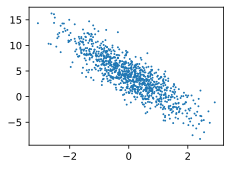

In [48]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),
                1)

In [49]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]



batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,"\n",y)
    break

    

tensor([[-0.0590,  0.4689],
        [-0.3583,  0.1824],
        [ 0.3579,  0.4199],
        [-0.4188,  0.0541],
        [-0.1560, -0.8837],
        [ 0.8665, -0.7856],
        [-0.1082,  1.2409],
        [ 1.5148,  1.5882],
        [-0.2864, -0.2884],
        [-0.1248, -0.6403]]) 
 tensor([[ 2.5010],
        [ 2.8434],
        [ 3.4908],
        [ 3.1704],
        [ 6.9015],
        [ 8.6015],
        [-0.2390],
        [ 1.8273],
        [ 4.6049],
        [ 6.1284]])


In [50]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [51]:
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [52]:
def squared_loss(y_hat,y):
    """均方误差"""
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [53]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr *param.grad / batch_size
            param.grad.zero_()

In [54]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f"epoch {epoch+1},loss{float(train_l.mean()):f}")

epoch 1,loss0.036544
epoch 2,loss0.000133
epoch 3,loss0.000049


In [57]:
print(f"{true_w-w.reshape(true_w.shape)}")
print(f"{true_b-b}")

tensor([ 1.3947e-05, -3.0828e-04], grad_fn=<SubBackward0>)
tensor([0.0003], grad_fn=<RsubBackward1>)
